<a href="https://colab.research.google.com/github/MpRonald/Machine-Learning/blob/main/Associate_Rules2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip -qq install apyori

  Preparing metadata (setup.py) ... done


In [15]:
import apyori
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(16,8)

In [16]:
url = 'https://raw.githubusercontent.com/higoramario/univesp-com360-mineracao-dados/main/market-basket-optimisation.csv'
data = pd.read_csv(url, header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# removendo espaços
for idx in data.columns:
    data.idx = data[idx].str.strip()

<ipython-input-17-33f846245638>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.idx = data[idx].str.strip()


In [26]:
# juntando valores não nulos e ordenando
items = data.melt()['value'].dropna().sort_values()
print(f'Nomes e quantidades dos itens: \n{items.value_counts()} ')

Nomes e quantidades dos itens: 
mineral water    1788
eggs             1348
spaghetti        1306
french fries     1282
chocolate        1230
                 ... 
bramble            14
cream               7
napkins             5
water spray         3
 asparagus          1
Name: value, Length: 120, dtype: int64 


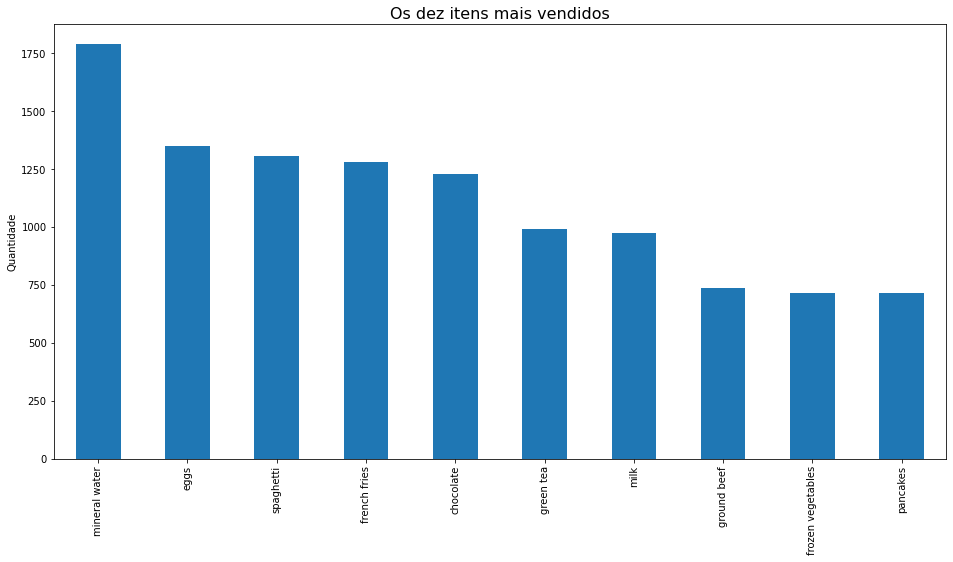

In [32]:
top_ten = items.value_counts().nlargest(10).plot(kind='bar')
top_ten.set_title('Os dez itens mais vendidos', size=16, weight=500, pad=5)
top_ten.set_ylabel('Quantidade');

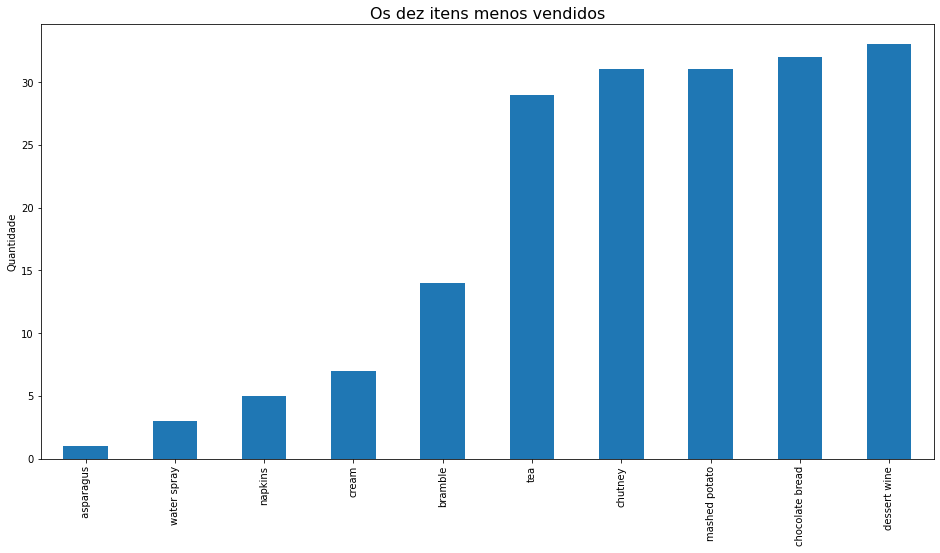

In [33]:
last_ten = items.value_counts().nsmallest(10).plot(kind='bar')
last_ten.set_title('Os dez itens menos vendidos', size=16, weight=500, pad=5)
last_ten.set_ylabel('Quantidade');

In [35]:
# removendo dados que contém um único produto
qt_basket = data.notna().apply(sum, axis=1)
basket = [set(line.dropna()) for _, line in data[qt_basket > 1].iterrows()]
basket[:6]

[{'almonds',
  'antioxydant juice',
  'avocado',
  'cottage cheese',
  'energy drink',
  'frozen smoothie',
  'green grapes',
  'green tea',
  'honey',
  'low fat yogurt',
  'mineral water',
  'olive oil',
  'salad',
  'salmon',
  'shrimp',
  'spinach',
  'tomato juice',
  'vegetables mix',
  'whole weat flour',
  'yams'},
 {'burgers', 'eggs', 'meatballs'},
 {'avocado', 'turkey'},
 {'energy bar', 'green tea', 'milk', 'mineral water', 'whole wheat rice'},
 {'french fries', 'whole wheat pasta'},
 {'light cream', 'shallot', 'soup'}]

In [36]:
print(f'Antes tínhamos {len(data)} e agora temos {len(basket)}')

Antes tínhamos 7501 e agora temos 5747


In [38]:
min_sup = 0.04
min_conf = 0.3

asso_rules = apyori.apriori(basket, min_support=min_sup, min_confidence=min_conf)

for rules in asso_rules:
    itens = list(rules.items)
    print(
        f"{itens[:1]} --> {[itens[-1]]} - Suporte: {rules.support:.3f}"
        f" Confiança: {rules.ordered_statistics[0].confidence:.3f}"
    )

['chocolate'] --> ['mineral water'] - Suporte: 0.069 Confiança: 0.342
['mineral water'] --> ['eggs'] - Suporte: 0.066 Confiança: 0.304
['frozen vegetables'] --> ['mineral water'] - Suporte: 0.047 Confiança: 0.385
['mineral water'] --> ['ground beef'] - Suporte: 0.053 Confiança: 0.429
['spaghetti'] --> ['ground beef'] - Suporte: 0.051 Confiança: 0.411
['milk'] --> ['mineral water'] - Suporte: 0.063 Confiança: 0.383
['pancakes'] --> ['mineral water'] - Suporte: 0.044 Confiança: 0.375
['mineral water'] --> ['spaghetti'] - Suporte: 0.078 Confiança: 0.357
